# Estacionaridade

Um fenômeno aleatório pode ser tal que sua densidade de probabilidade varia com o tempo - $p(x,t)$.

In [5]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
from scipy.stats import norm
from scipy import signal
plt.rcParams.update({'font.size': 14})
import IPython.display as ipd # to play signals
import sounddevice as sd

# Um conjunto de ruídos brancos

Vamos gerar um sinal cuja densidade de probabilidade varia com o tempo. Faremos isso, a partir de uma distribuição normal, mas

\begin{equation}
p(x, t) = \mathcal{N}(\mu_x(t), \sigma_x(t)) = \frac{1}{\sqrt{2\pi}\sigma_x(t)}\mathrm{e}^{-\frac{1}{2\sigma_{x}^{2}(t)}(x(t)-\mu_x(t))^2}
\end{equation}
em que $\mu_x(t)$ é a média e $\sigma_{x}(t)$ é o desvio padrão (ambos podem variar com o tempo).

## Exemplo 1 - Não estacionário

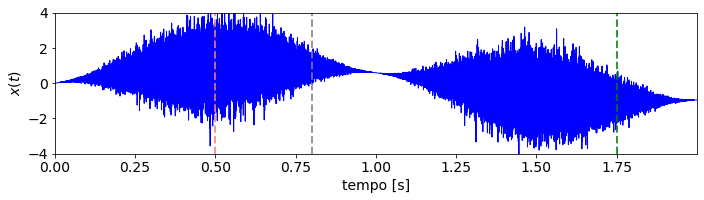

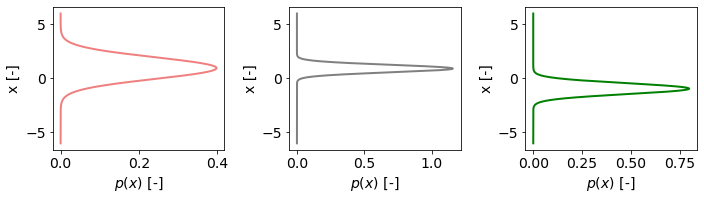

In [52]:
# Tempo
fs = 44100
time = np.arange(0,2, 1/fs)

# parâmetros de um fenômeno, cuja p(x) varia com o tempo
mu_x = np.sin(2*np.pi*0.4*time)    # média 
mod_x = np.sin(2*np.pi*0.5*time)   # desvio padrão

# sinal
xt = np.random.normal(loc = mu_x, scale = mod_x**2, size=len(time))

# plot signal
plt.figure(figsize = (10, 3))
plt.plot(time, xt, linewidth = 1, color = 'b')
plt.axvline(0.5, color='lightcoral',linestyle = '--', linewidth = 2, alpha = 0.8)
plt.axvline(0.80, color='grey',linestyle = '--', linewidth = 2, alpha = 0.8)
plt.axvline(1.75, color='green',linestyle = '--', linewidth = 2, alpha = 0.8)
plt.ylabel(r'$x(t)$')
plt.xlim((0, time[-1]))
plt.ylim((-4, 4))
plt.xlabel('tempo [s]')
plt.tight_layout()

# plot p(x,t)
x = np.arange(-6, 6, 0.01)
px1 = norm.pdf(x, loc= mu_x[int(0.50*fs)], scale = mod_x[int(0.50*fs)]**2)
px2 = norm.pdf(x, loc= mu_x[int(0.80*fs)], scale = mod_x[int(0.80*fs)]**2)
px3 = norm.pdf(x, loc= mu_x[int(1.75*fs)], scale = mod_x[int(1.75*fs)]**2)

plt.figure(figsize = (10, 3))
plt.subplot(1,3,1)
plt.plot(px1, x, 'lightcoral', linewidth = 2)
plt.xlabel(r'$p(x)$ [-]')
plt.ylabel(r'x [-]')
plt.subplot(1,3,2)
plt.plot(px2, x, 'grey', linewidth = 2)
plt.xlabel(r'$p(x)$ [-]')
plt.ylabel(r'x [-]')
plt.subplot(1,3,3)
plt.plot(px3, x, 'green', linewidth = 2)
plt.xlabel(r'$p(x)$ [-]')
plt.ylabel(r'x [-]')
plt.tight_layout()

## Exemplo 2 - Estacionário com respeito a média

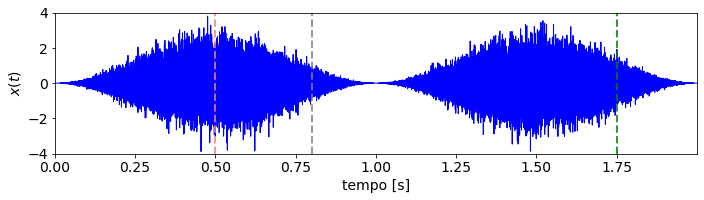

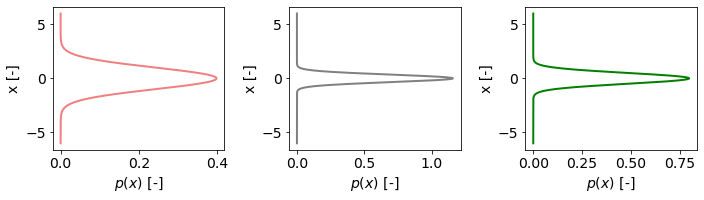

In [58]:
# Tempo
fs = 44100
time = np.arange(0,2, 1/fs)

# parâmetros de um fenômeno, cuja p(x) varia com o tempo
mu_x = 0.0    # média 
mod_x = np.sin(2*np.pi*0.5*time)   # desvio padrão

# sinal
xt = np.random.normal(loc = mu_x, scale = mod_x**2, size=len(time))

# plot signal
plt.figure(figsize = (10, 3))
plt.plot(time, xt, linewidth = 1, color = 'b')
plt.axvline(0.5, color='lightcoral',linestyle = '--', linewidth = 2, alpha = 0.8)
plt.axvline(0.80, color='grey',linestyle = '--', linewidth = 2, alpha = 0.8)
plt.axvline(1.75, color='green',linestyle = '--', linewidth = 2, alpha = 0.8)
plt.ylabel(r'$x(t)$')
plt.xlim((0, time[-1]))
plt.ylim((-4, 4))
plt.xlabel('tempo [s]')
plt.tight_layout()

# plot p(x,t)
x = np.arange(-6, 6, 0.01)
px1 = norm.pdf(x, loc= mu_x, scale = mod_x[int(0.50*fs)]**2)
px2 = norm.pdf(x, loc= mu_x, scale = mod_x[int(0.80*fs)]**2)
px3 = norm.pdf(x, loc= mu_x, scale = mod_x[int(1.75*fs)]**2)

plt.figure(figsize = (10, 3))
plt.subplot(1,3,1)
plt.plot(px1, x, 'lightcoral', linewidth = 2)
plt.xlabel(r'$p(x)$ [-]')
plt.ylabel(r'x [-]')
plt.subplot(1,3,2)
plt.plot(px2, x, 'grey', linewidth = 2)
plt.xlabel(r'$p(x)$ [-]')
plt.ylabel(r'x [-]')
plt.subplot(1,3,3)
plt.plot(px3, x, 'green', linewidth = 2)
plt.xlabel(r'$p(x)$ [-]')
plt.ylabel(r'x [-]')
plt.tight_layout()

ipd.Audio(xt, rate=fs) # load a NumPy array

## Exemplo 3 - Estacionário com respeito a variância

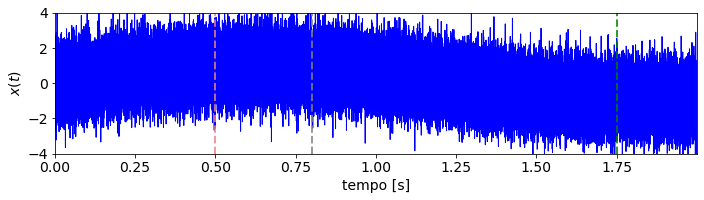

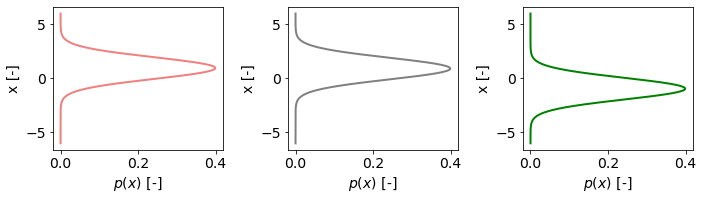

In [57]:
# Tempo
fs = 44100
time = np.arange(0,2, 1/fs)

# parâmetros de um fenômeno, cuja p(x) varia com o tempo
mu_x = np.sin(2*np.pi*0.4*time)    # média 
sigma_x = 1.0   # desvio padrão

# sinal
xt = np.random.normal(loc = mu_x, scale = sigma_x, size=len(time))

# plot signal
plt.figure(figsize = (10, 3))
plt.plot(time, xt, linewidth = 1, color = 'b')
plt.axvline(0.5, color='lightcoral',linestyle = '--', linewidth = 2, alpha = 0.8)
plt.axvline(0.80, color='grey',linestyle = '--', linewidth = 2, alpha = 0.8)
plt.axvline(1.75, color='green',linestyle = '--', linewidth = 2, alpha = 0.8)
plt.ylabel(r'$x(t)$')
plt.xlim((0, time[-1]))
plt.ylim((-4, 4))
plt.xlabel('tempo [s]')
plt.tight_layout()

# plot p(x,t)
x = np.arange(-6, 6, 0.01)
px1 = norm.pdf(x, loc= mu_x[int(0.50*fs)], scale = sigma_x)
px2 = norm.pdf(x, loc= mu_x[int(0.80*fs)], scale = sigma_x)
px3 = norm.pdf(x, loc= mu_x[int(1.75*fs)], scale = sigma_x)

plt.figure(figsize = (10, 3))
plt.subplot(1,3,1)
plt.plot(px1, x, 'lightcoral', linewidth = 2)
plt.xlabel(r'$p(x)$ [-]')
plt.ylabel(r'x [-]')
plt.subplot(1,3,2)
plt.plot(px2, x, 'grey', linewidth = 2)
plt.xlabel(r'$p(x)$ [-]')
plt.ylabel(r'x [-]')
plt.subplot(1,3,3)
plt.plot(px3, x, 'green', linewidth = 2)
plt.xlabel(r'$p(x)$ [-]')
plt.ylabel(r'x [-]')
plt.tight_layout()


## Exemplo 4 - Estacionário com respeito a média e a variância


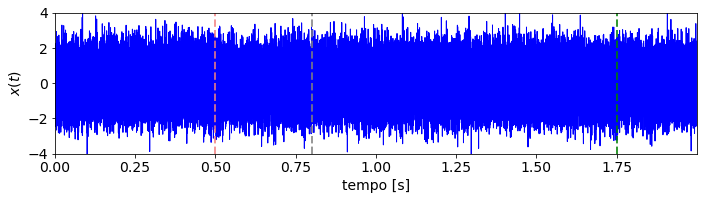

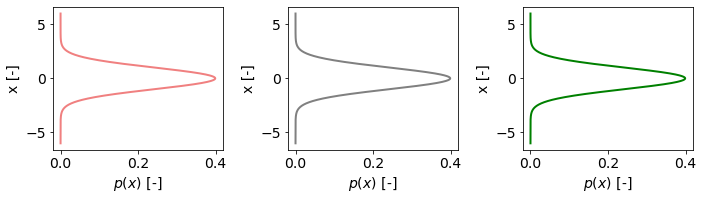

In [56]:
# Tempo
fs = 44100
time = np.arange(0,2, 1/fs)

# parâmetros de um fenômeno, cuja p(x) varia com o tempo
mu_x = 0.0    # média 
sigma_x = 1.0   # desvio padrão

# sinal
xt = np.random.normal(loc = mu_x, scale = sigma_x, size=len(time))

# plot signal
plt.figure(figsize = (10, 3))
plt.plot(time, xt, linewidth = 1, color = 'b')
plt.axvline(0.5, color='lightcoral',linestyle = '--', linewidth = 2, alpha = 0.8)
plt.axvline(0.80, color='grey',linestyle = '--', linewidth = 2, alpha = 0.8)
plt.axvline(1.75, color='green',linestyle = '--', linewidth = 2, alpha = 0.8)
plt.ylabel(r'$x(t)$')
plt.xlim((0, time[-1]))
plt.ylim((-4, 4))
plt.xlabel('tempo [s]')
plt.tight_layout()

# plot p(x,t)
x = np.arange(-6, 6, 0.01)
px1 = norm.pdf(x, loc= mu_x, scale = sigma_x)
px2 = norm.pdf(x, loc= mu_x, scale = sigma_x)
px3 = norm.pdf(x, loc= mu_x, scale = sigma_x)

plt.figure(figsize = (10, 3))
plt.subplot(1,3,1)
plt.plot(px1, x, 'lightcoral', linewidth = 2)
plt.xlabel(r'$p(x)$ [-]')
plt.ylabel(r'x [-]')
plt.subplot(1,3,2)
plt.plot(px2, x, 'grey', linewidth = 2)
plt.xlabel(r'$p(x)$ [-]')
plt.ylabel(r'x [-]')
plt.subplot(1,3,3)
plt.plot(px3, x, 'green', linewidth = 2)
plt.xlabel(r'$p(x)$ [-]')
plt.ylabel(r'x [-]')
plt.tight_layout()

ipd.Audio(xt, rate=fs) # load a NumPy array